# EXPLORATORY DATA ANALYSIS 
---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils as eda

# URL
URL = r'C:\Users\Francesc\Documents\GitHub\machine-learning-python-template\data\interim\eda_total_data.csv'
# DATASET
total_data = pd.read_csv(URL)
#TARGET VARIABLE
target = 'price'

<small> Note: The 'utils.py' file contains **specific functions** according to the standards of Exploratory Data Analysis (EDA) and Descriptive Data Analysis (DDA). The functions with the prefix 'eda' are described in the 'utils.py' doc <small>

The dataset will be reordered:

In [3]:
total_data = eda.move_target_to_end(total_data,target)

## Step 1: Multivariable analysis
---

_NOTE: Since there are two categorical variables 'neighbourhood_group' and 'room_type, a factorization process will be made._

### 1.1. Factorization:

In [4]:
total_data['neighbourhood_group'] = pd.factorize(total_data['neighbourhood_group'])[0] 
total_data['room_type'] = pd.factorize(total_data['room_type'])[0]

The index for de columns is the following:

**neighbourhood_group**
- 0 = Brooklyn
- 1 = Manhattan
- 2 = Queens
- 3 = Staten Island
- 4 = Bronx

**room_type**
- 0 = Private Room
- 1 = Entire home/apt
- 2 = Shared room

In [5]:
total_data.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,availability_365,price
0,0,40.64749,-73.97237,0,1,365,149
1,1,40.75362,-73.98377,1,1,355,225
2,1,40.80902,-73.94190,0,3,365,150
3,0,40.68514,-73.95976,1,1,194,89
4,1,40.79851,-73.94399,1,10,0,80


### 1.2. Numerical - Numerical analysis between predictors and target:

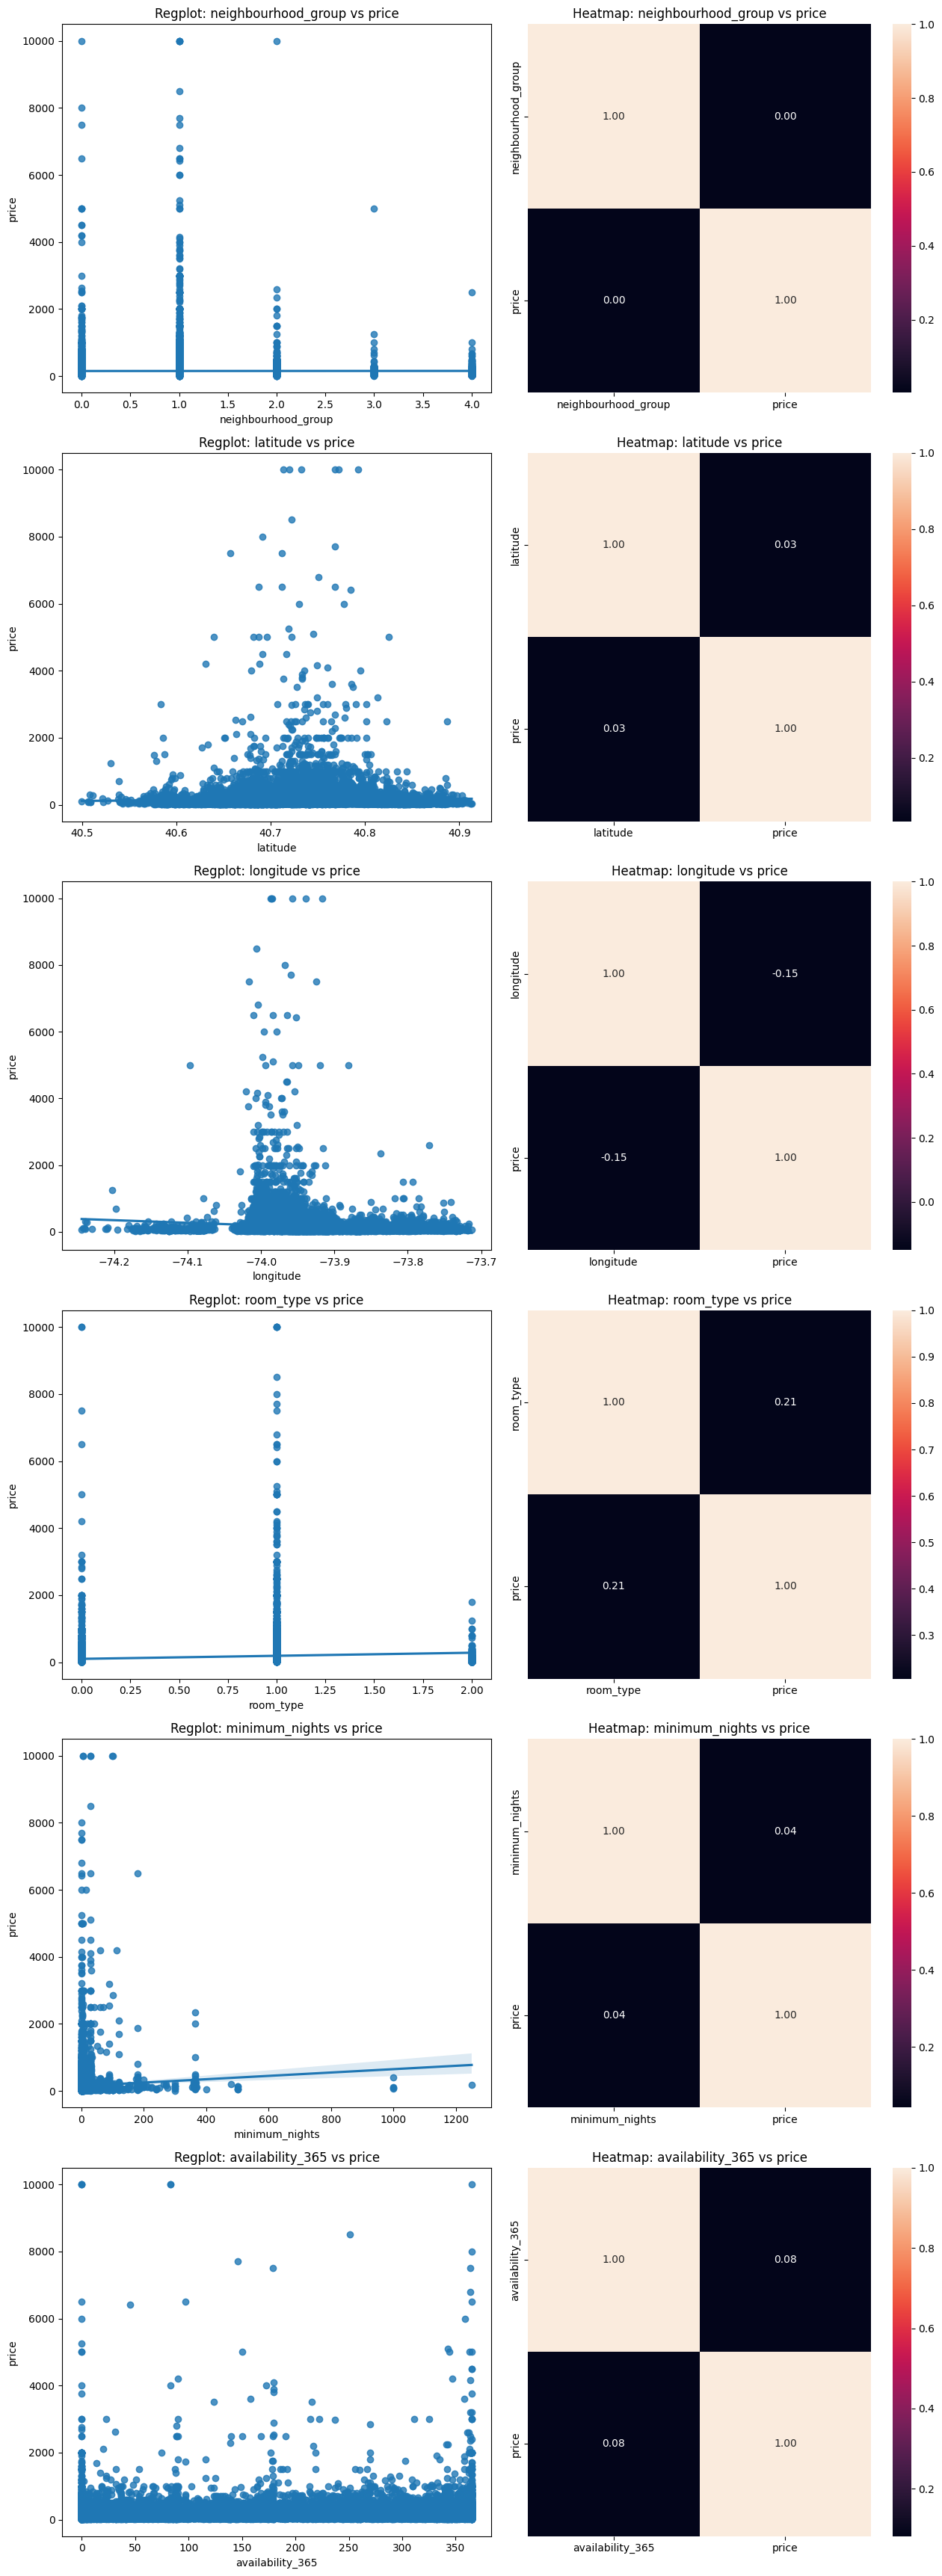

In [6]:
# CUSTOM FUNCTION FOR NUMERICAL-NUMERICAL ANALYSIS
eda.plot_scatter_heatmaps(total_data,'price')

### 1.3. General correlation heatmap:

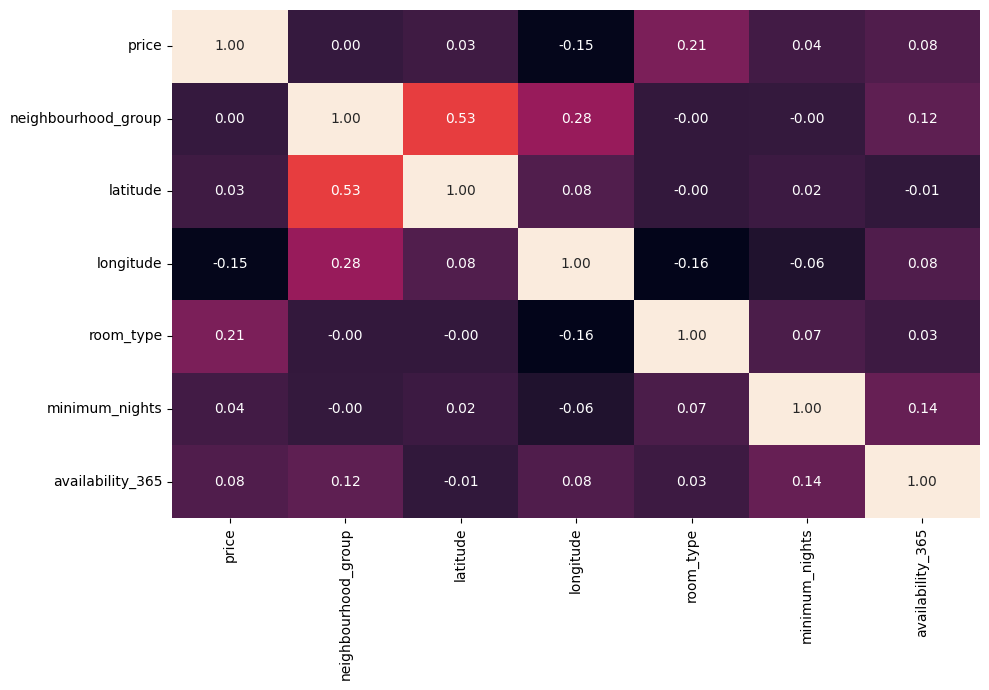

In [7]:
eda.general_heatmap(total_data,'price')

The numerical-numerical analysis yields the following conclusion:
There are no variables with significant influence. The most notable ones are room_type (0.21), longitude (0.15), and annual availability_365 (0.08).







### 1.4. General dataset scatter plot:

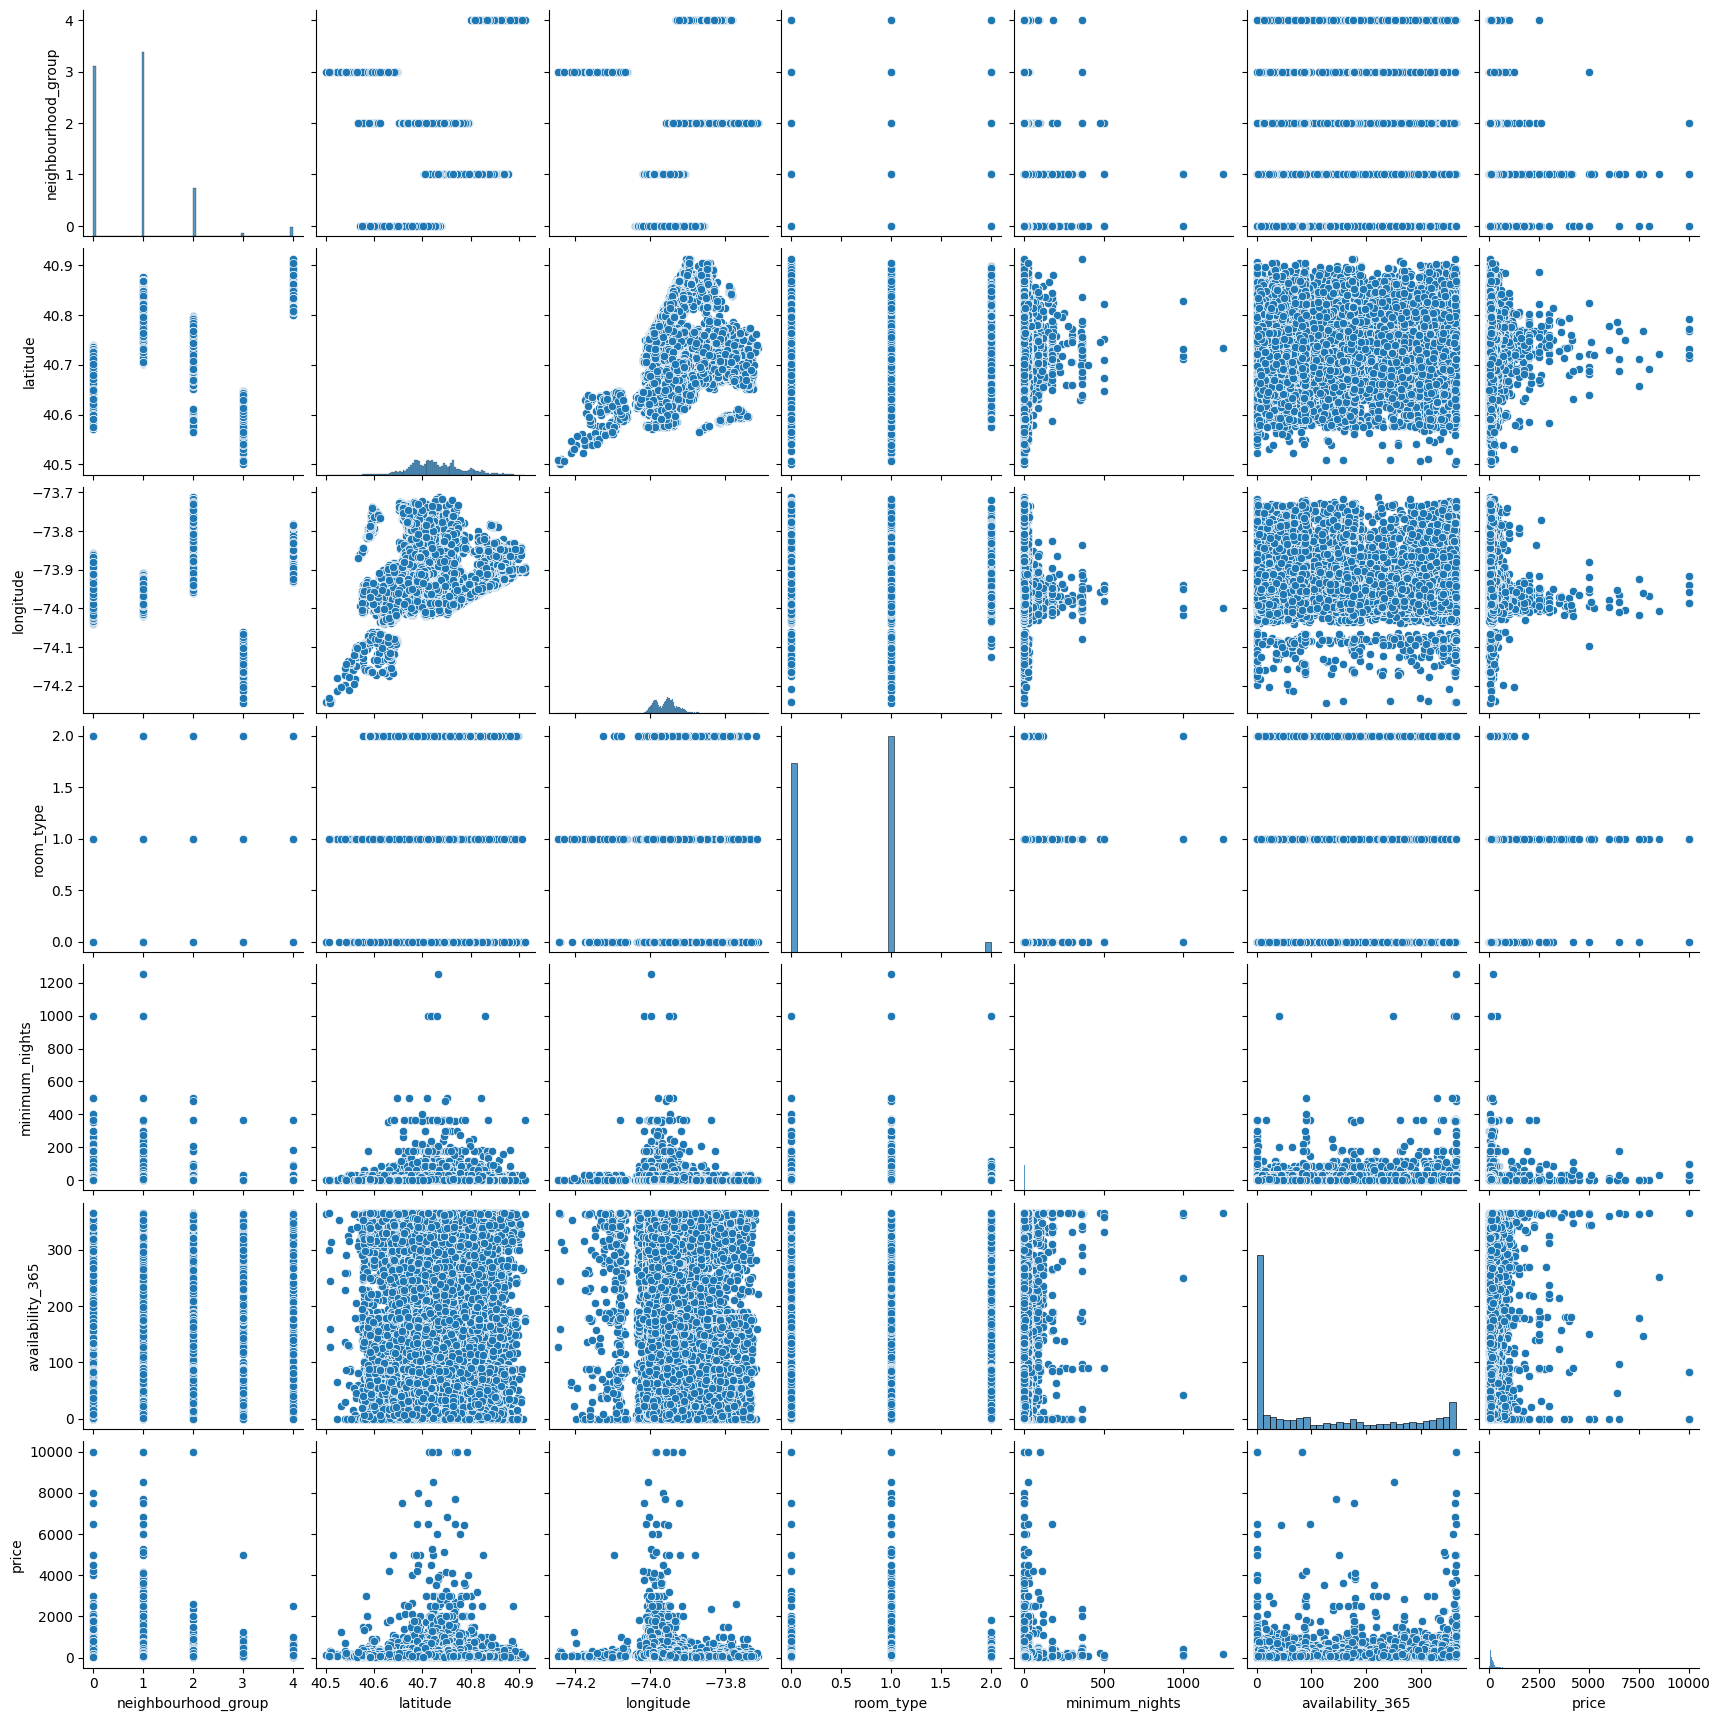

In [8]:
# General pairplot
sns.pairplot(data = total_data)

### 1.4. Original dataset train / test division:

<small>_NOTE: This train/test split includes all the provided data without any exclusions. No outlier filtering, replacement, or variable merging has been performed at this stage. The seed used for the split is 42._<small>

In [9]:
# CUSTOM FUNCTION for early train / test division
eda.early_split(total_data,'price')

## STEP 2: FEATURE ENGINEERING

---

### 2.1. Outiler analysis:

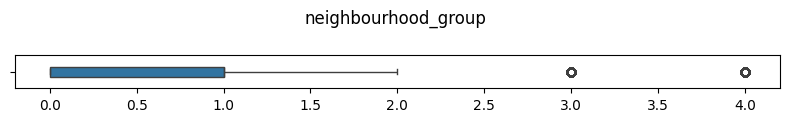

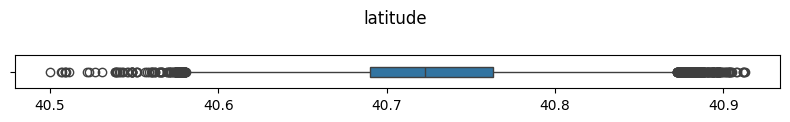

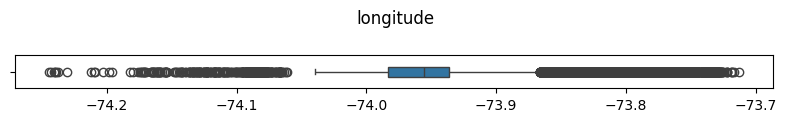

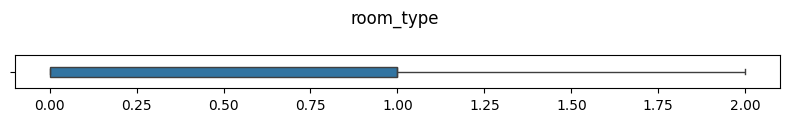

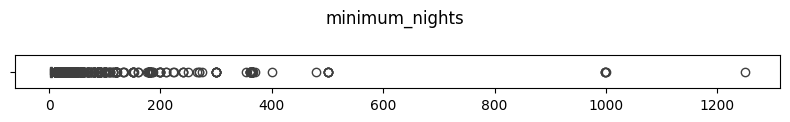

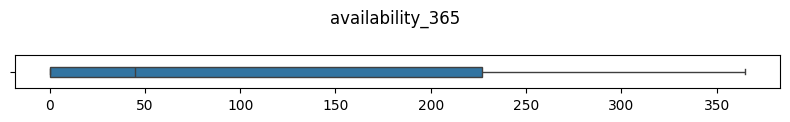

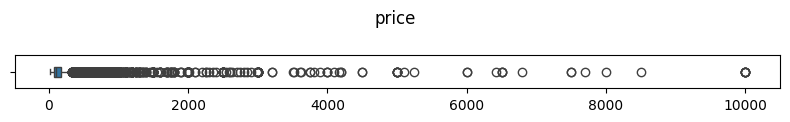

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,48884.0,0.786986,0.844288,0.00000,0.00000,1.000000,1.00000,4.00000
latitude,48884.0,40.728953,0.054532,40.49979,40.69010,40.723080,40.76312,40.91306
longitude,48884.0,-73.952176,0.046159,-74.24442,-73.98308,-73.955685,-73.93629,-73.71299
room_type,48884.0,0.567118,0.541183,0.00000,0.00000,1.000000,1.00000,2.00000
minimum_nights,48884.0,7.029887,20.512224,1.00000,1.00000,3.000000,5.00000,1250.00000
availability_365,48884.0,112.779498,131.627271,0.00000,0.00000,45.000000,227.00000,365.00000
price,48884.0,152.755053,240.170260,10.00000,69.00000,106.000000,175.00000,10000.00000


In [10]:
# CUSTOM FUNCTION for standard outlier analysis (graph and description)
eda.outlier_analysis(total_data,'Outcome')

Statistical outliers are present in the columns 'latitude,' 'longitude', 'minimum_nights,' and 'neighbourhood_group.'.

- The groups **'latitude,' 'longitude,' and 'neighbourhood_group'** are discarded as outliers due to their logical correlation with the expected outcomes.
- **'Minimum_nights'** and **'availability_365'** will undergo further examination. 

The next step will involve plotting minimum and maximun ocurrences in order obtain more detaills about the distance between max or min vaules. The following plot shows the **occurrences** in the max and min values of the variables:

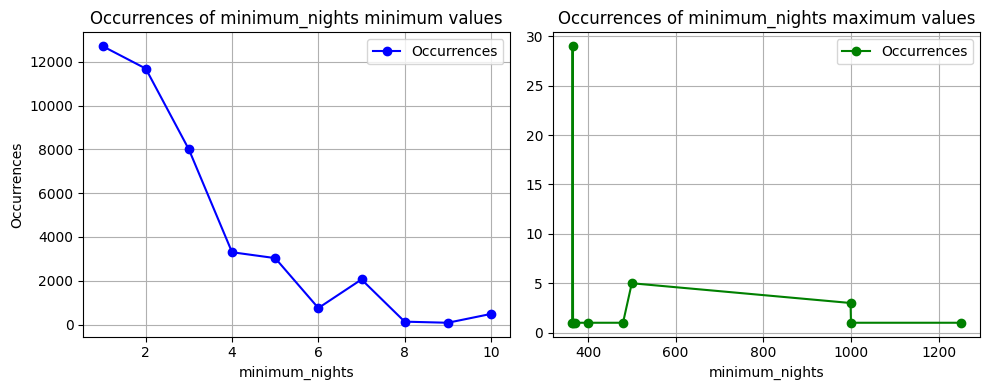

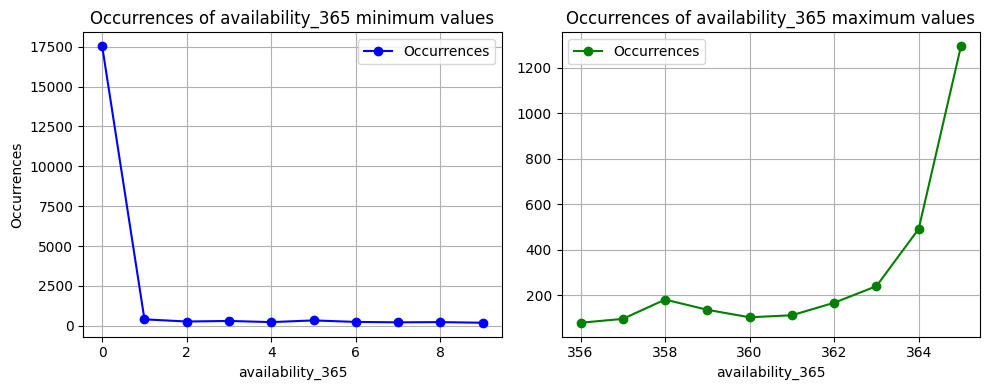

In [11]:
# CREATING A MASK FOR OUTLIERS COLUMNS
outliers_columns = ['minimum_nights','availability_365']
# CUSTOM GRAPH FOR OCURRENCIES APPLIED TO OUTLIERS MASK
eda.min_max_records(total_data[outliers_columns], 'Outcome', 10)

This graphs shows that there are ocurrences in both predictors that can be considered as outliers. Next, A graph showing the total occurences depending on the values:

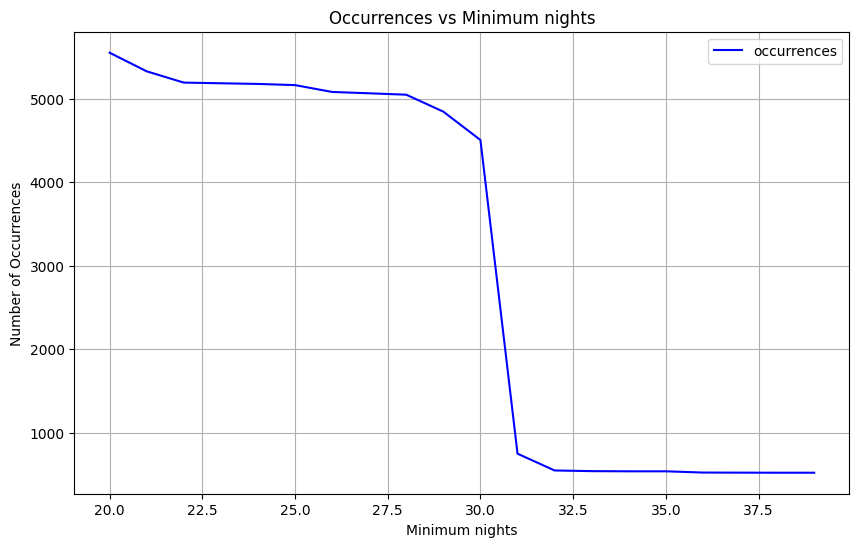

In [12]:
# GRÁFICO DE OUTLIERS
nights_range = range(20, 40)
outliers = [(total_data['minimum_nights'] >= night).sum() for night in nights_range]
plt.figure(figsize=(10, 6))
plt.plot(nights_range, outliers, linestyle='-', color='b', label='occurrences')
plt.xlabel('Minimum nights')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences vs Minimum nights')
plt.grid(True)
plt.legend()
plt.show()

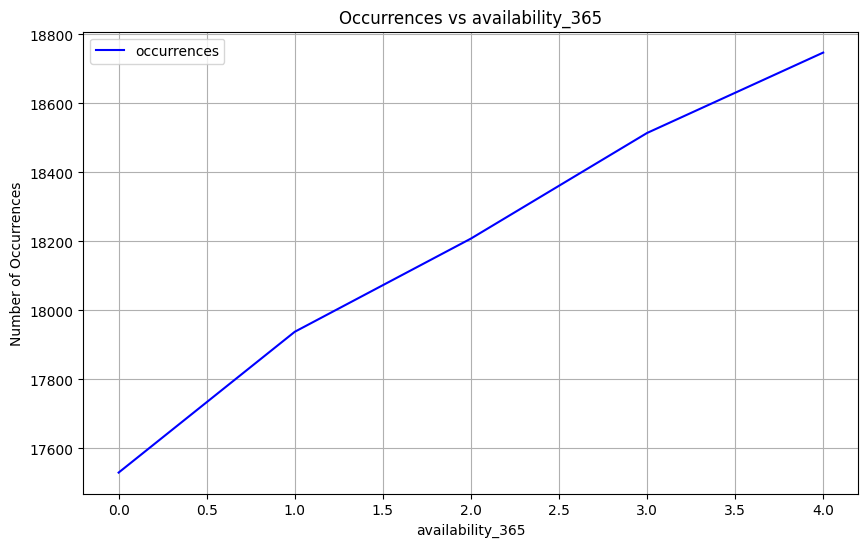

In [13]:
# GRÁFICO DE OUTLIERS
nights_range = range(0, 5)
outliers = [(total_data['availability_365'] <= night).sum() for night in nights_range]
plt.figure(figsize=(10, 6))
plt.plot(nights_range, outliers, linestyle='-', color='b', label='occurrences')
plt.xlabel('availability_365')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences vs availability_365')
plt.grid(True)
plt.legend()
plt.show()

After the graph analysis, it is possible to determine the following:

1. **'minimum_nights'** has no 0-values and many high values. There is a particular GAP between 30 nights (4,500 entries) and 31 nights (600 entries).
2. **'availability_365'** have at least 17.500 occurrencies with 0 value, with can be considered as an **imput error*.

According to the Airbnb website, there is no minimum limit for the number of nights for Airbnb stays in New York. Based on an analysis of the existing records concerning the minimum number of nights, the following observations were made: Starting from **31 nights**, the percentage of records is **1.53%** of the dataset. However, from **30 nights (one month)** onward, the percentage significantly increases to **9.22%** of the dataset. Therefore, it is decided to consider 31 as the threshold beyond which the results are treated as outliers (747 records).
 



In [14]:
# CREATING MASK ONLY FOR OUTLIERS
outliers = total_data[
    (total_data['availability_365'] == 0) |
    (total_data['minimum_nights'] >= 31) 
]
# CUSTOM FUNCTION FOR OUTLIERS SUMMARY
eda.outliers_summary(total_data,outliers)

the rows with outliers are 18132
the total rows are 48884
this represents 37.0 % of the dataset


Since they represent the 37% of the dataset, it is not recommended to eliminate or replace them.
Thus, the following analysis will be made without considering the 0 results in 'availability_365' and 'minimum_nights'.
**The null results and the outliers will be replaced with NaN values**.


In [15]:
# REPLACING THE 0 AND OUTLIERS VALUES FOR NaN
filtered_total_data = total_data.copy()
filtered_total_data['availability_365'] = filtered_total_data['availability_365'].replace(0, np.nan)
filtered_total_data.loc[filtered_total_data['minimum_nights'] >= 31, 'minimum_nights'] = np.nan
print("NaN values per column:")
filtered_total_data.isna().sum()

NaN values per column:


neighbourhood_group        0
latitude                   0
longitude                  0
room_type                  0
minimum_nights           747
availability_365       17530
price                      0
dtype: int64

Now, the analysis will be performed with the filtered dataset. Here there is a comparison between datasets.

In [16]:
print("ORIGINAL DATASET", total_data.shape)
total_data[outliers_columns].describe().T

ORIGINAL DATASET (48884, 7)


,count,mean,std,min,25%,50%,75%,max
minimum_nights,48884.0,7.029887,20.512224,1.0,1.0,3.0,5.0,1250.0
availability_365,48884.0,112.779498,131.627271,0.0,0.0,45.0,227.0,365.0


In [17]:
print("FILTERED DATASET", filtered_total_data.shape)
filtered_total_data[outliers_columns].describe().T

FILTERED DATASET (48884, 7)


,count,mean,std,min,25%,50%,75%,max
minimum_nights,48137.0,5.579284,8.203124,1.0,1.0,2.0,5.0,30.0
availability_365,31354.0,175.834439,126.195374,1.0,55.0,168.0,305.0,365.0


According to EDA analysis standards, NaN values will be **replaced with the mean of each variable**.

In [18]:
df_mean = filtered_total_data.mean()
clean_total_data = filtered_total_data.copy()
clean_total_data = clean_total_data.fillna(df_mean)

print("DATASET WITH 0 VALUES REPLACED BY MEAN", clean_total_data.shape)
clean_total_data[outliers_columns].describe().T

DATASET WITH 0 VALUES REPLACED BY MEAN (48884, 7)


,count,mean,std,min,25%,50%,75%,max
minimum_nights,48884.0,5.579284,8.140206,1.0,1.0,3.000000,5.0,30.0
availability_365,48884.0,175.834439,101.065763,1.0,100.0,175.834439,227.0,365.0


It is possible to see that the mean-replacement lowered the mean from 7.03 to 5.58 and increased the availability_365 mean from 112.78 to 175.83. Moreover, the standard deviation also lowered in both cases (from 20.51 to 8.14 and from 131.62 to 101.06 respectively). A comparative summary of the associations between the predictor variables and the target variable at each stage will be presented:

In [19]:
# CUSTOM FUNCTION FOR CORRELATION COMPARISON BETWEEN DATASETS
eda.corr_comparison(total_data,filtered_total_data,clean_total_data,'price')

,Original,Filtered,Mean rep.
neighbourhood_group,0.002616,0.002616,0.002616
latitude,0.033899,0.033899,0.033899
longitude,-0.149954,-0.149954,-0.149954
room_type,0.206079,0.206079,0.206079
minimum_nights,0.042805,0.034526,0.032265
availability_365,0.081847,0.074505,0.063215


**Variable Results:**
   - for 'minimum_nights' and 'availability_365' initial filtering improved correlation, but additional mean replacement reduced correlation. This implies that the initial filtering was beneficial, but subsequent mean replacement may have eliminated relevant information.

The histograms displaying the values distribution after mean replacement. It is possible to see that the distribution of the variables have become lightly more normal. The histogram shows a large increase of values in Variables 'SkinThickness' and 'Insulin' due to the replacent done.

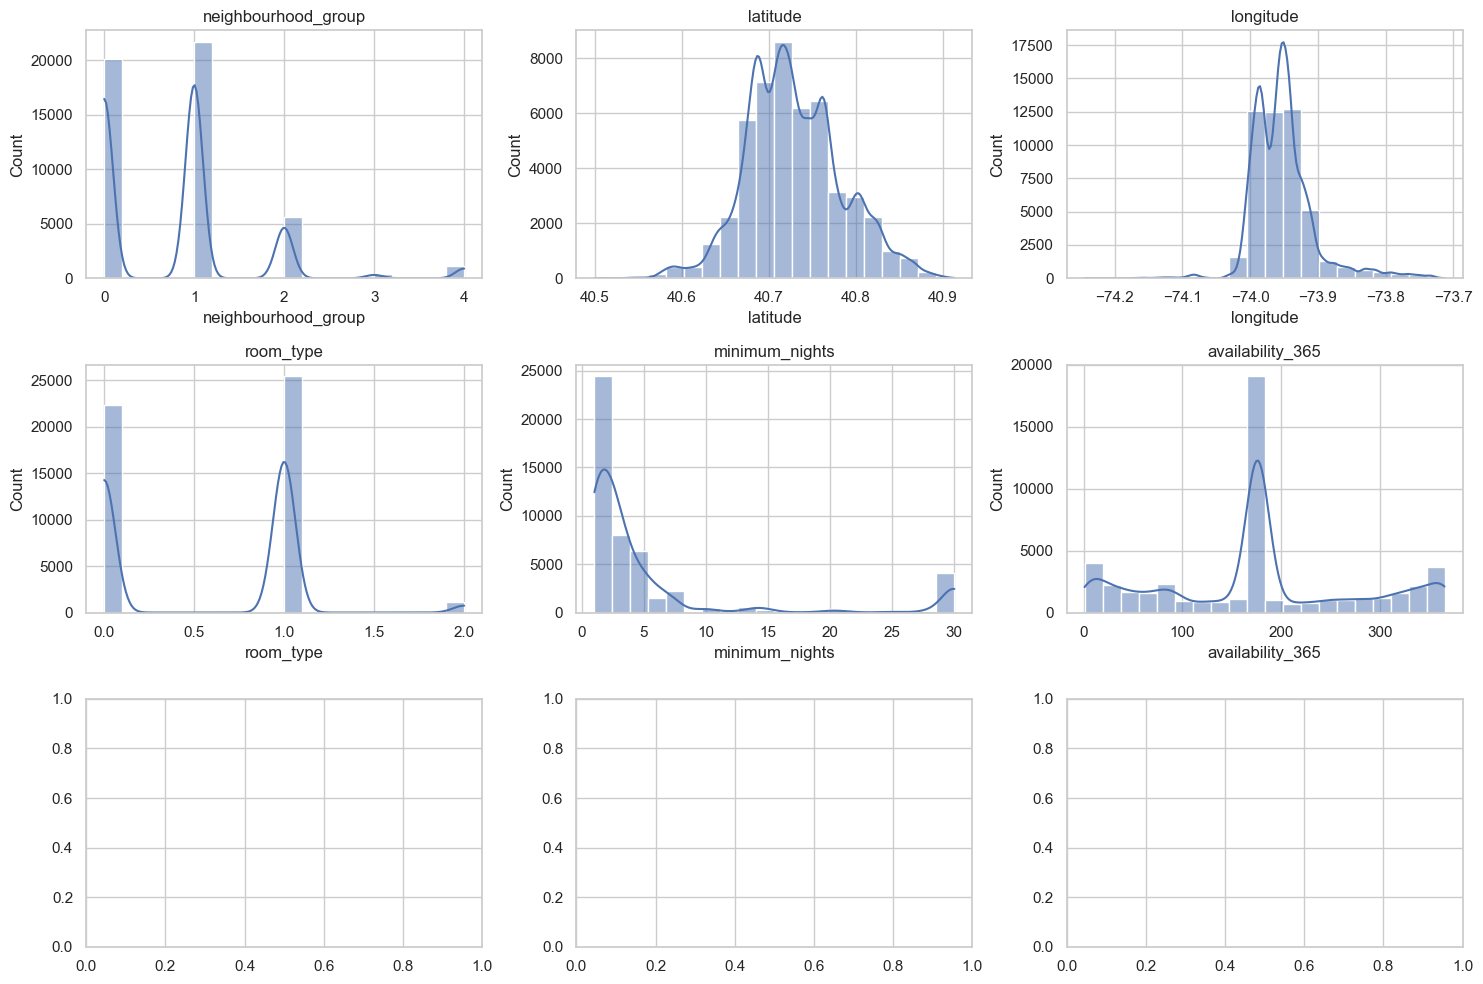

In [20]:
# CUSTOM FUNCTION FOR HISTOGRAMS
eda.small_histogram(clean_total_data,'price')

In [22]:
clean_total_data.to_csv('clean_total_data.csv',index= False)

### Step 3: Feature engineering
_NOTE: Following the completion of the research, it is determined that there are no viable options for merging variables or generating new features. Consequently, the filtered dataset will be partitioned and preserved in its entirety, retaining all variables within it._

---

### 3.1. Train / Test division

In [24]:
from sklearn.model_selection import train_test_split

num_variables = ['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'availability_365']

# We divide the dataset into training and test samples
X = total_data.drop("price", axis = 1)[num_variables]
y = total_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,availability_365
44548,2,40.70840,-73.78882,1,3,37
31352,0,40.70343,-73.93412,0,5,0
42263,4,40.89981,-73.86684,0,2,70
11756,1,40.74526,-73.99545,0,14,0
23349,0,40.67075,-73.97690,0,1,0


### 3.2. Standard value scalation

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,availability_365
44548,1.438922,-0.378083,3.542731,0.797215,-0.195648,-0.578053
31352,-0.933519,-0.469215,0.389794,-1.050292,-0.100454,-0.858685
42263,3.811364,3.131694,1.849736,-1.050292,-0.243245,-0.327759
11756,0.252702,0.297798,-0.941036,-1.050292,0.327918,-0.858685
23349,-0.933519,-1.068450,-0.538510,-1.050292,-0.290842,-0.858685


### 3.3. Features selection

In [27]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 5 queremos decir implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,latitude,longitude,room_type,minimum_nights,availability_365
0,40.70840,-73.78882,1.0,3.0,37.0
1,40.70343,-73.93412,0.0,5.0,0.0
2,40.89981,-73.86684,0.0,2.0,70.0
3,40.74526,-73.99545,0.0,14.0,0.0
4,40.67075,-73.97690,0.0,1.0,0.0


### 3.4. CSV creation

In [31]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)

X_train_sel.to_csv("clean_aparments_train.csv", index=False)
X_test_sel.to_csv("clean_aparments_test.csv", index=False)

## GENERAL CONCLUSIONS OF EDA ANALYSIS

With this step, the Exploratory Data Analysis (EDA) is considered complete. Below are concise bullet points summarizing the main conclusions:


**1. General Dataset Conclusions:**

**_Dataset Overview:_**
- The dataset comprises 48,895 entries and a total of 16 columns, including the target variable and predictors. there are 15 variables, including the numerical target variable 'price'.

**_Data Characteristics:_**
- There are 9 numeric predictors and 6 categorical predictors, and the target variable 'price' provides a number that is associated with USD dollars.

**_Data Quality:_**
- Two variables, 'last_review' and 'number_of_reviews,' exhibit 10,000 null values. Apart from these, the dataset is complete, with almost no missing values observed across other entries. Several columns have been dropped from the dataset for being deemed irrelevant or unnecessary. 

**_Dropped features:_**
-  The columns "id," "name," "host_id," "host_name," "neighbourhood," "number_of_reviews," "last_reviews," "reviews_per_month,` and "calculated_host_listings_count." were dropped due to the lack of important information.

**_Dropped rows:_**
- Entries with a target variable value of 0 have been removed, totaling 11 entries.

---

**2. Summary of Correlations Between Predictor Variables and the Target Variable (Outcome):**

| neighbourhood_group  | Original   | Filtered   | Mean rep. | Evolution  |
|----------------------|------------|------------|-----------|------------|
| neighbourhood_group  |  0.00      |  0.00      |  0.00     | Similar    |
| latitude             |  0.03      |  0.03      |  0.03     | Similar    |
| longitude            | -0.14      | -0.14      | -0.14     | Similar    |
| room_type            |  0.20      |  0.20      |  0.20     | Similar    |
| minimum_nights       |  0.04      |  0.03      |  0.03     | Negative   |
| availability_365     |  0.08      |  0.07      |  0.06     | Negative   |

---

**3. Outliers and Variable Analysis:**

- Graphs reveal accurate 'latitude' and 'longitude' values, while the 'price' variable is primarily distributed between 1 and 1,000, with occasional peaks reaching 10,000. However, the 'minimum_nights' distribution displays irregularities, particularly with extremely high entries (minimum of 100 nights). Additionally, the 'availability_365' field includes instances with '0'.

- The replacement of the 0 values resulted in a decrease of the correlation between the predictors and the taget variable.

---

**4. Feature engineering:**

The dataset has no variables merging possibilities. After de standard escalation, the feature selecction dropped 'neighbourhood_group', leaving 'latitude', 'longitude', 'room_type', 'minimum_nights' and 'availability_365' as the main predictors for data analysis.

---

**5. Overall conclusions:**

The dataset does not provide the required data to create a Machine Learning model that allows to make regression predictions. 
